In [37]:
# import necessary libraries
import pandas as pd
import numpy as np


In [38]:
# loading the dataset from excel file to pandas DataFrame
df=pd.read_excel("online_retail_II (1).xlsx")                           

In [39]:
# first 5 rows of the dataframe
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [40]:
# number of data points & number of features
df.shape

(525461, 8)

In [41]:
# getting some information about thye dataset
df.drop(columns=['InvoiceDate'],axis=1)


,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,3.75,17530.0,United Kingdom


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [43]:
'''Categorical Features:
   -Invoice
   -StockCode
   -Description
   -Country
   Numerical Features:
   -Quantity
   -Price 
   -Customer ID
   -InvoiceDate   
   TimeStamp:
   -InvoiceDate'''
    

'Categorical Features:\n   -Invoice\n   -StockCode\n   -Description\n   -Country\n   Numerical Features:\n   -Quantity\n   -Price \n   -Customer ID\n   -InvoiceDate   \n   TimeStamp:\n   -InvoiceDate'

In [44]:
# checking for missing values
df.isna().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

Handling Missing Values

handling missing values in Customer ID

In [45]:
df['Customer ID'].mean()

15360.645477973052

In [46]:
# filling the missing values in "Item_weight column" with "Mean" value
df['Customer ID'].fillna(df['Customer ID'].mean(), inplace=True)


In [47]:
df.isna().sum()


Invoice           0
StockCode         0
Description    2928
Quantity          0
InvoiceDate       0
Price             0
Customer ID       0
Country           0
dtype: int64

handling missing values in Description

In [48]:
from sklearn.impute import SimpleImputer
df=pd.DataFrame(SimpleImputer(strategy="most_frequent").fit_transform(df))
print(df.isna().sum())

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64


In [50]:
#convert mixed data to string
for i in [0,1,2]:
    df[i] = df[i].astype(str)

Feature Scaling

Apply LadelEncoding

In [57]:
from sklearn.preprocessing import LabelEncoder
for i in [0,1,2,4,7]:    
    df[i]=LabelEncoder().fit_transform(df[i])
print(df.head()) 


   0     1     2   3  4     5        6   7
0  0  3892    55  12  0  6.95  13085.0  37
1  0  3052  2920  12  0  6.75  13085.0  37
2  0  3054    27  12  0  6.75  13085.0  37
3  0  1393  3236  48  0   2.1  13085.0  37
4  0   708  4067  24  0  1.25  13085.0  37
0             0
1             0
2             0
3             0
4             0
          ...  
525456    25295
525457    25295
525458    25295
525459    25295
525460    25295
Name: 4, Length: 525461, dtype: int64


In [52]:
#spliting the data
target=df[7]
data = df.drop(columns=[7])
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(data,target,test_size=0.3)
print(xtrain.shape,ytrain.shape,xtest.shape,ytest.shape) 

(367822, 7) (367822,) (157639, 7) (157639,)


Applying Standardisation

In [53]:
from sklearn.preprocessing import StandardScaler
print(StandardScaler().fit_transform(df))

[[-1.72534517  1.83836452 -1.82508395 ...  0.015474   -1.5188346
   0.26431907]
 [-1.72534517  1.08059972  0.36838352 ...  0.01410532 -1.5188346
   0.26431907]
 [-1.72534517  1.08240392 -1.84652098 ...  0.01410532 -1.5188346
   0.26431907]
 ...
 [ 1.5507794   0.18932397 -0.69810869 ... -0.00642479  1.4478928
   0.26431907]
 [ 1.5507794  -1.24050604  0.39977346 ... -0.00642479  1.4478928
   0.26431907]
 [ 1.5507794  -0.47011182 -0.20811945 ... -0.01874287  1.4478928
   0.26431907]]


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   0       525461 non-null  int32 
 1   1       525461 non-null  int32 
 2   2       525461 non-null  int32 
 3   3       525461 non-null  object
 4   4       525461 non-null  int64 
 5   5       525461 non-null  object
 6   6       525461 non-null  object
 7   7       525461 non-null  int32 
dtypes: int32(4), int64(1), object(3)
memory usage: 24.1+ MB


In [55]:
df.head()

,0,1,2,3,4,5,6,7
0,0,3892,55,12,0,6.95,13085.0,37
1,0,3052,2920,12,0,6.75,13085.0,37
2,0,3054,27,12,0,6.75,13085.0,37
3,0,1393,3236,48,0,2.1,13085.0,37
4,0,708,4067,24,0,1.25,13085.0,37


Applying Classification 

In [70]:
#applying LogisticRegression
from sklearn.linear_model import LogisticRegression
model_1=LogisticRegression(max_iter=1000)
model_1.fit(xtrain,ytrain)
from sklearn.metrics import accuracy_score
pred_train=model_1.predict(xtrain)
pred_test=model_1.predict(xtest)
print("training accuracy is ",accuracy_score(pred_train,ytrain))
print("testing accuracy is ",accuracy_score(pred_test,ytest))



KeyboardInterrupt: 

In [62]:
#applying decision tree
from sklearn.tree import DecisionTreeClassifier
model_2=DecisionTreeClassifier(criterion="entropy", max_depth=2)
model_2.fit(xtrain,ytrain)
from sklearn.metrics import accuracy_score
pred_train=model_2.predict(xtrain)
pred_test=model_2.predict(xtest)
print("training accuracy is ",accuracy_score(pred_train,ytrain))
print("testing accuracy is ",accuracy_score(pred_test,ytest))


training accuracy is  0.9410829151056761
testing accuracy is  0.9415436535375129


[Text(0.5, 0.8333333333333334, 'x[6] <= 12744.5\nentropy = 0.665\nsamples = 367822\nvalue = [457, 365, 75, 748, 25, 43, 50, 656, 389, 312, 6743\n256, 4089, 5757, 347, 55, 49, 49, 531, 155, 38, 11\n115, 120, 1905, 24, 257, 140, 740, 77, 79, 884\n665, 837, 46, 165, 318, 339980, 232, 38]'),
 Text(0.25, 0.5, 'x[6] <= 12463.0\nentropy = 3.094\nsamples = 15313\nvalue = [444, 280, 29, 624, 0, 0, 0, 0, 380, 223, 0, 256\n3857, 5549, 145, 0, 49, 49, 505, 0, 0, 0, 0, 0\n1, 0, 229, 43, 104, 44, 79, 816, 529, 707, 46\n165, 90, 43, 27, 0]'),
 Text(0.125, 0.16666666666666666, 'entropy = 3.487\nsamples = 3695\nvalue = [444, 280, 29, 624, 0, 0, 0, 0, 380, 223, 0, 15\n276, 42, 0, 0, 49, 0, 77, 0, 0, 0, 0, 0, 1\n0, 229, 0, 104, 44, 0, 127, 0, 707, 0, 0, 0\n32, 12, 0]'),
 Text(0.375, 0.16666666666666666, 'entropy = 2.156\nsamples = 11618\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 241, 3581\n5507, 145, 0, 0, 49, 428, 0, 0, 0, 0, 0, 0, 0\n0, 43, 0, 0, 79, 689, 529, 0, 46, 165, 90, 11\n15, 0]'),
 Text(0.75, 

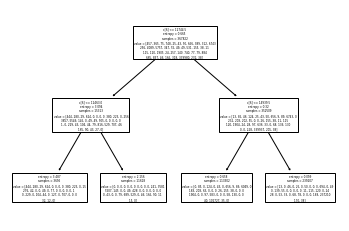

In [63]:
from sklearn.tree import plot_tree
plot_tree(model_2)


In [64]:
from sklearn.linear_model import Perceptron
model_3=Perceptron()
model_3.fit(xtrain,ytrain)
pred_train=model_3.predict(xtrain)
pred_test=model_3.predict(xtest)
print("training accuracy is ",accuracy_score(pred_train,ytrain))
print("testing accuracy is ",accuracy_score(pred_test,ytest))


training accuracy is  0.9200754712877425
testing accuracy is  0.9206287784114338


Apply Hyperperameter Tunning

In [ ]:
from sklearn.model_selection import GridSearchCV

# create a dictionary of hyperparameters for each model
params_lr = {'C': [0.01, 0.1, 1, 10, 100]}
params_dt = {'max_depth': [2, 4, 6, 8], 'min_samples_split': [2, 4, 6, 8]}
params_p = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1]}

# create the models
lr = LogisticRegression()
dt = DecisionTreeClassifier()
p = Perceptron()

# create the GridSearchCV objects
#grid_lr = GridSearchCV(lr, params_lr, cv=5)
grid_dt = GridSearchCV(dt, params_dt, cv=5)
grid_p = GridSearchCV(p, params_p, cv=5)

# fit the models to the training data
#grid_lr.fit(xtrain, ytrain)
grid_dt.fit(xtrain, ytrain)
grid_p.fit(xtrain, ytrain)

# print the best hyperparameters and test accuracy for each model
# print("Logistic Regression: best hyperparameters: ", grid_lr.best_params_)
# print("test accuracy: ", grid_lr.score(xtest, ytest))

print("Decision Tree: best hyperparameters: ", grid_dt.best_params_)
print("test accuracy: ", grid_dt.score(xtest, ytest))

print("Perceptron: best hyperparameters: ", grid_p.best_params_)
print("test accuracy: ", grid_p.score(xtest, ytest))
